In [34]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [35]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x=pd.read_csv("train_x.csv")
train_y=pd.read_csv("train_y.csv")
test_x=pd.read_csv("test_x.csv")
test_y=pd.read_csv("test_y.csv")
train_x=train_x.set_index("일시")
train_y=train_y.set_index("일시")
test_x=test_x.set_index("일시")
test_y=test_y.set_index("일시")

In [36]:
test_y.head()
a=["month","day","hour"]
train_x = train_x.drop(a,axis=1)
test_x = test_x.drop(a,axis=1)

In [37]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 2021-10-01 00:00:00 to 2021-09-30 23:00:00
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            8759 non-null   float64
 1   CO             8759 non-null   float64
 2   O3             8759 non-null   float64
 3   NO2            8759 non-null   float64
 4   PM10           8759 non-null   float64
 5   PM25           8759 non-null   float64
 6   기온(°C)         8759 non-null   float64
 7   강수량(mm)        8759 non-null   float64
 8   풍속(m/s)        8759 non-null   float64
 9   풍향(16방위)       8759 non-null   float64
 10  습도(%)          8759 non-null   int64  
 11  증기압(hPa)       8759 non-null   float64
 12  이슬점온도(°C)      8759 non-null   float64
 13  현지기압(hPa)      8759 non-null   float64
 14  해면기압(hPa)      8759 non-null   float64
 15  일조(hr)         8759 non-null   float64
 16  일사(MJ/m2)      8759 non-null   float64
 17  전운량(10분위)      8759 non-

In [38]:
train_x["풍향(16방위)"].unique()

array([360.        ,  20.        ,   0.        ,  50.        ,
       270.        , 290.        ,  90.        ,  70.        ,
       250.        , 180.        , 230.        , 340.        ,
       200.        , 160.        , 320.        , 110.        ,
       140.        , 276.66666667, 283.33333333])

---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [39]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()
model.fit(train_x,train_y)



LinearRegression()

In [40]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(test_x)


In [41]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print(mse(test_y,y_pred_LR))
print(r2_score(test_y,y_pred_LR))


36.937686422846255
0.933197336468617


In [42]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(model, 'LinearRegression.pkl') 



['LinearRegression.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [43]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model1 = RFR()
model1.fit(train_x,train_y)

C:\Users\dufwn\AppData\Local\Temp\ipykernel_4252\2603084954.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_x,train_y)


RandomForestRegressor()

In [44]:
# Test 데이터로 성능을 평가해보세요.
y_pred_rf=model1.predict(test_x)
print(round(mse(test_y,y_pred_rf),5))
print(round(r2_score(test_y,y_pred_rf),5))



40.05927
0.92755


In [45]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model1, 'rf.pkl') 


['rf.pkl']

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG})

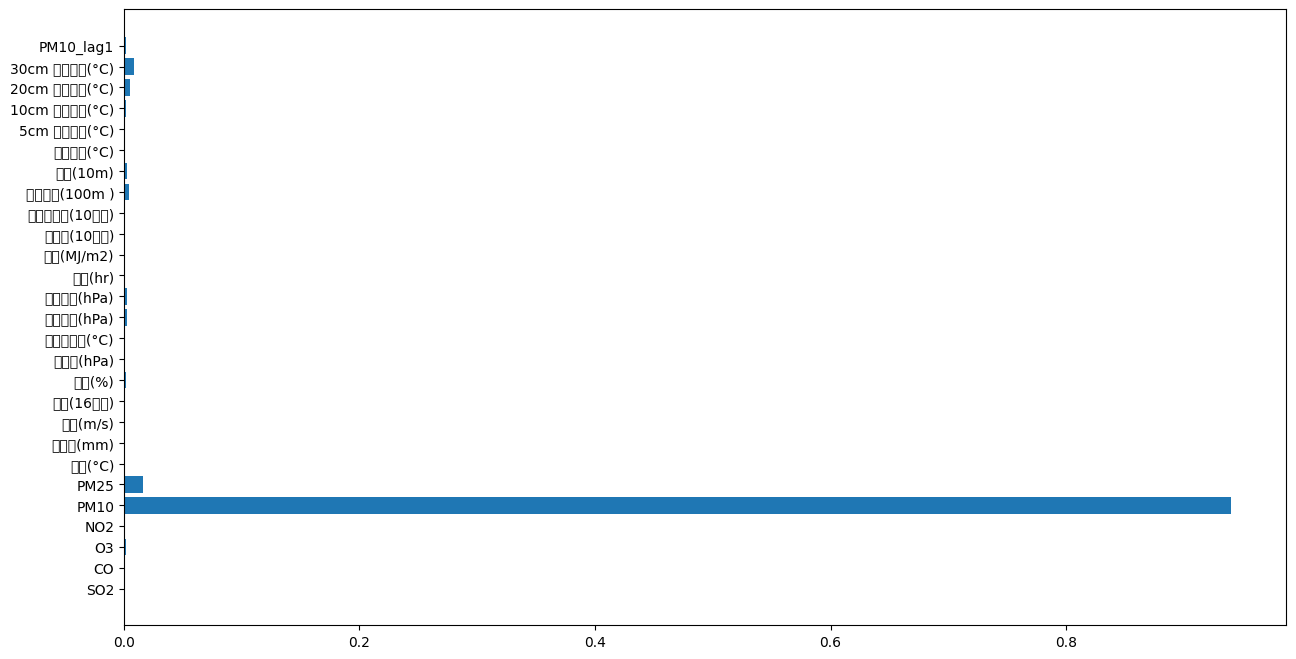

In [46]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.barh(y=list(train_x),width=model1.feature_importances_)
plt.show()


In [47]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [48]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model2 =GBR()
model2.fit(train_x,train_y) 


c:\Users\dufwn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [49]:
# Test 데이터로 성능을 평가해보세요.
import math
y_pred_gb = model2.predict(test_x)
print(math.sqrt(mse(test_y,y_pred_gb)))
print(round(r2_score(test_y,y_pred_gb),5))

5.982342978989884
0.93528


In [50]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model2, 'gbr.pkl') 




['gbr.pkl']

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG})

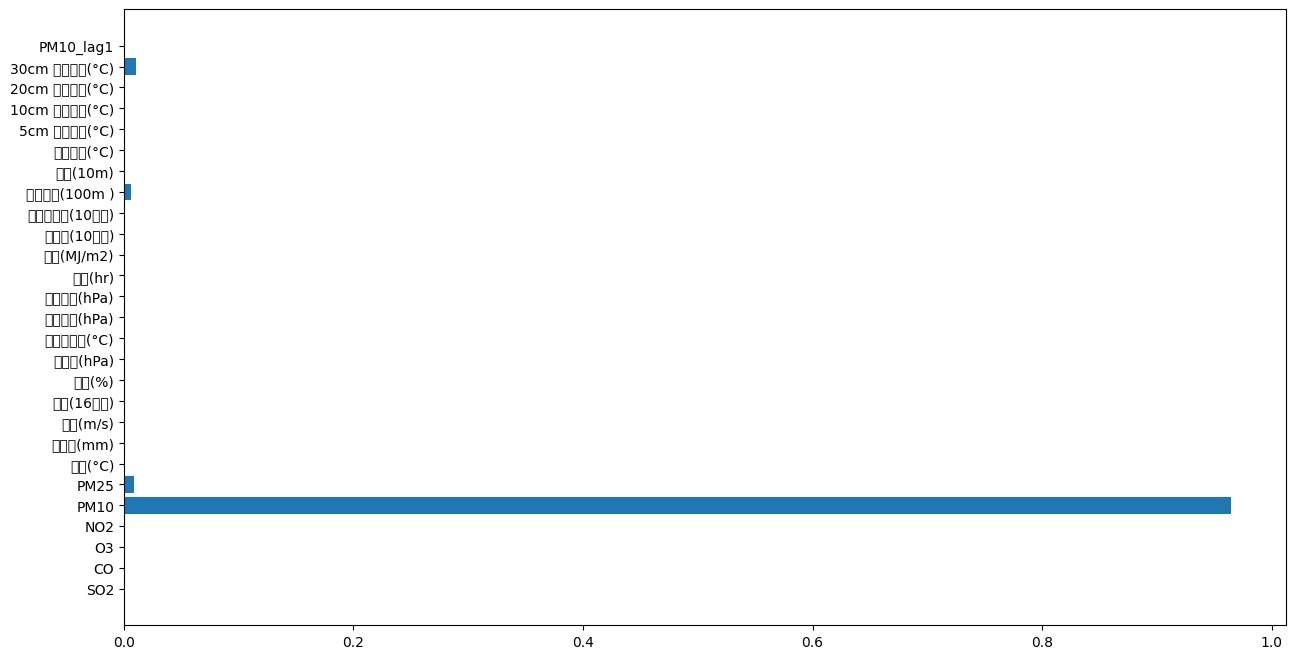

In [51]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.barh(y=list(train_x),width=model2.feature_importances_)
plt.show()



In [52]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [53]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model3 =ElasticNet()
model3.fit(train_x,train_y)
y_pred_el=model.predict(test_x)


In [54]:
# Test 데이터로 성능을 평가해보세요.
print(round(r2_score(test_y,y_pred_el),5))



0.9332


In [55]:
# 학습한 모델을 파일로 저장해보세요.




In [56]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [57]:
# Feature의 중요도 확인





In [58]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

In [59]:
import tensorflow as tf
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.model_selection import GridSearchCV
model4 = RFR(min_samples_leaf=5,min_samples_split=5)
params={"max_depth":range(5,26),"n_estimators":[100,200,300]}
model5 = GridSearchCV(model4,params,cv=5,scoring="r2",n_jobs=-1)
with tf.device("/device:GPU:0"):
    model5.fit(train_x,train_y)

c:\Users\dufwn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [60]:
print(model5.best_params_)
print(model5.best_score_) 

{'max_depth': 9, 'n_estimators': 100}
0.9043402764714299


In [61]:
y_pred_grid = model.predict(test_x)
r2_score(test_y,y_pred_grid)

0.933197336468617

In [62]:
joblib.dump(model5, 'rfgrid.pkl') 

['rfgrid.pkl']

In [63]:
gg = joblib.load('rfgrid.pkl') 
y_pred1=gg.predict(test_x)
r2_score(test_y,y_pred1)

0.9335734805386822

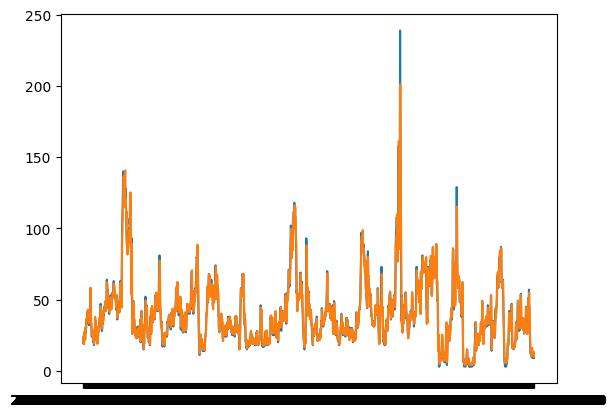

In [64]:
plt.plot(test_y, label='Actual')
plt.plot(y_pred1, label='Predicted')
plt.show()

In [66]:
y_pred7=model7.predict(test_x)
r2_score(test_y,y_pred7)

0.9130377985637905

In [67]:
model8 = LGBMRegressor(device="gpu")
model8.fit(train_x,train_y)

LGBMRegressor(device='gpu')

In [69]:
#필요한 모듈을 import 합니다.
from numba import cuda

#이후 초기화 작업을 진행해줍니다.
device = cuda.get_current_device()
device.reset()

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.